<a href="https://colab.research.google.com/github/Nurkyial/python_lab/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
con=sqlite3.Connection('/content/northwind.db')
df=pd.read_sql('''with revenues as (SELECT
 shipregion,
 customerid,
 orders.orderid,
 orderdate,
  productid,
 (unitprice*quantity*(1-discount)) as revenue
from orders,"order details"
on orders.orderid="order details".orderid
group by orderdate,shipregion,customerid,orders.orderid, productid)
SELECT orderdate,shipregion, customerid,sum(revenue) as revenuedaily, count(orderid) as ordersdaily
from revenues
group by orderdate;''',con=con)

2.1 Создать линейные графики, описывающие историю выручки (revenuedaily) и числа заказов (ordersdaily) (суммарно за неделю)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df

,orderdate,shipregion,customerid,revenuedaily,ordersdaily
0,2016-07-04,Western Europe,VINET,440.0000,3
1,2016-07-05,Western Europe,TOMSP,1863.4000,2
2,2016-07-08,South America,HANAR,2206.6600,6
3,2016-07-09,Western Europe,SUPRD,3597.9000,3
4,2016-07-10,South America,HANAR,1444.8000,3
...,...,...,...,...,...
475,2018-04-30,Southern Europe,FRANS,2525.3500,8
476,2018-05-01,North America,SAVEA,5448.5700,10
477,2018-05-04,Western Europe,DRACD,2473.9300,5
478,2018-05-05,Western Europe,LEHMS,7632.4750,12


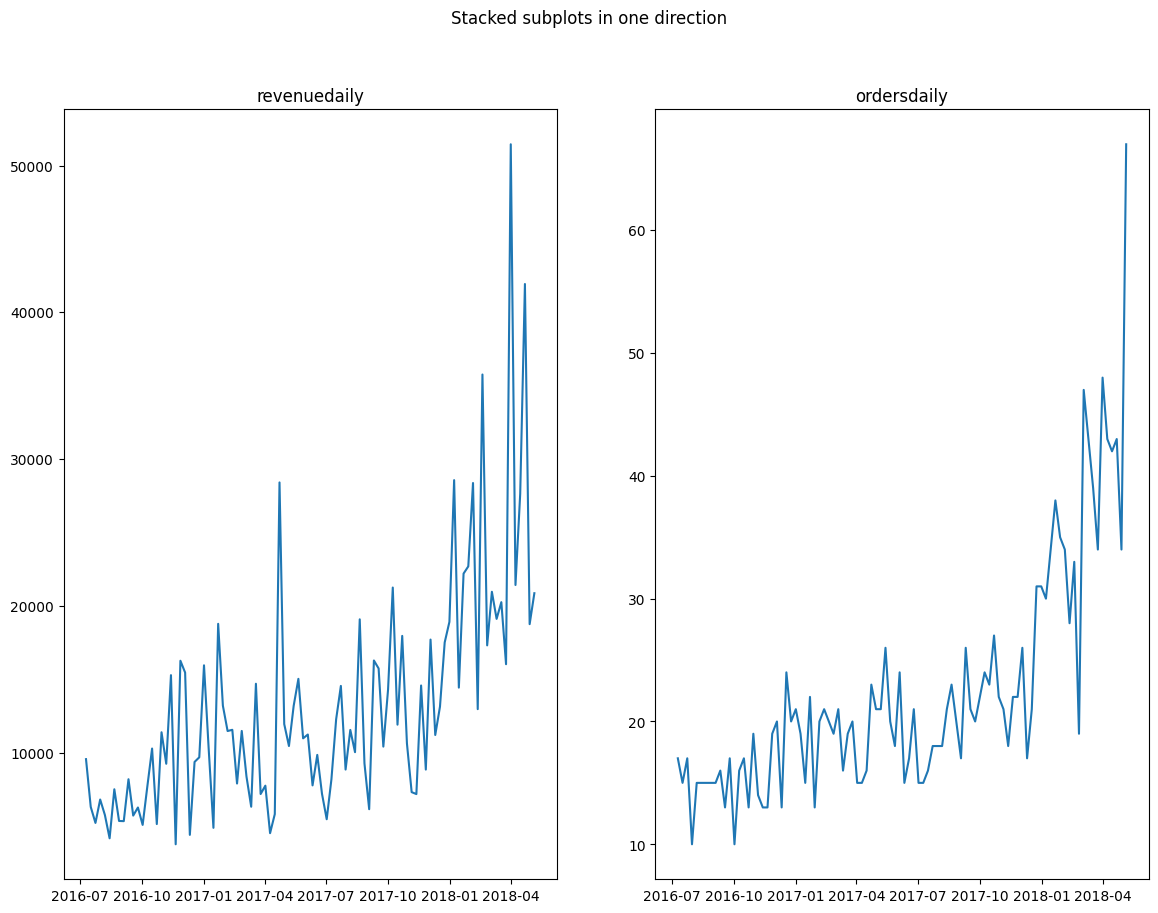

In [ ]:
df['orderdate'] = pd.to_datetime(df['orderdate'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))


df.set_index('orderdate', inplace=True)
weekly_sum = df.revenuedaily.resample('W').sum()
weekly_order = df.ordersdaily.resample('W').sum()
ax[0].plot(weekly_sum)
ax[1].plot(weekly_order)
# plot 2 subplots
ax[0].set_title('revenuedaily')
ax[1].set_title('ordersdaily')

fig.suptitle('Stacked subplots in one direction')
plt.show()

2.2 Создать круговую диаграмму, описывающую долю региона (shipregion) в сумме выручки (revenue) за весь период

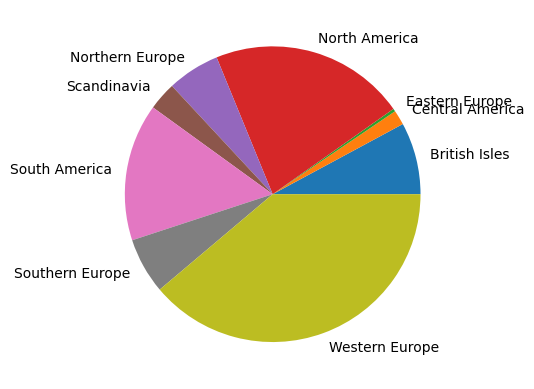

In [ ]:
revenue_daily = df.groupby(['shipregion'])['revenuedaily'].sum()
plt.pie(revenue_daily, labels=revenue_daily.index)
plt.show()

2.3 Создать столбчатую диаграмму, описывающую выручку клиентов, относящихся к классу A. Согласно ABC анализу это список клиентов, которые приносят 80% суммарной выручки за период.


In [ ]:
revenues = df.groupby(['customerid'])['revenuedaily'].sum().sort_values(ascending=False)
customer_revenue = revenues.cumsum()/ revenues.sum()
print(customer_revenue)


customerid
SAVEA    0.077393
ERNSH    0.142331
QUICK    0.201201
HILAA    0.236229
FOLKO    0.269037
           ...   
ANATR    0.999059
OCEAN    0.999458
LAZYK    0.999740
THECR    0.999920
CENTC    1.000000
Name: revenuedaily, Length: 88, dtype: float64
